In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd 
df=pd.read_excel('Task1and2/train.xlsx')

In [3]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [5]:
df.target.describe()

count    36752.000000
mean        76.006721
std         46.934098
min          0.000000
25%         32.000000
50%         74.000000
75%        118.000000
max        159.000000
Name: target, dtype: float64

In [6]:
X=df.iloc[:,:-1]
y=df.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

[Text(0.7679273592715232, 0.9545454545454546, 'x[1] <= -43.5\ngini = 0.993\nsamples = 24623\nvalue = [149, 142, 130, 141, 145, 284, 275, 137, 153, 126\n154, 134, 136, 282, 142, 138, 134, 298, 138, 132\n141, 289, 277, 137, 139, 137, 415, 265, 129, 122\n301, 140, 421, 282, 138, 156, 149, 149, 150, 135\n139, 143, 139, 130, 146, 142, 138, 128, 145, 143\n140, 140, 146, 137, 148, 145, 135, 149, 139, 144\n144, 141, 134, 153, 137, 148, 143, 145, 138, 144\n138, 139, 154, 146, 160, 135, 140, 128, 137, 122\n136, 132, 145, 143, 152, 138, 131, 146, 134, 143\n130, 148, 146, 147, 142, 138, 141, 150, 128, 142\n141, 130, 140, 142, 144, 131, 142, 135, 134, 133\n146, 133, 144, 130, 137, 131, 149, 150, 145, 287\n149, 146, 161, 142, 139, 133, 167, 143, 147, 132\n144, 155, 143, 289, 130, 147, 135, 140, 148, 154\n140, 127, 125, 129, 130, 147, 147, 144, 136, 142\n149, 121, 128, 155, 131, 134, 149, 136, 141, 148]'),
 Text(0.5689673013245033, 0.8636363636363636, 'x[12] <= -50.5\ngini = 0.993\nsamples = 24258\nv

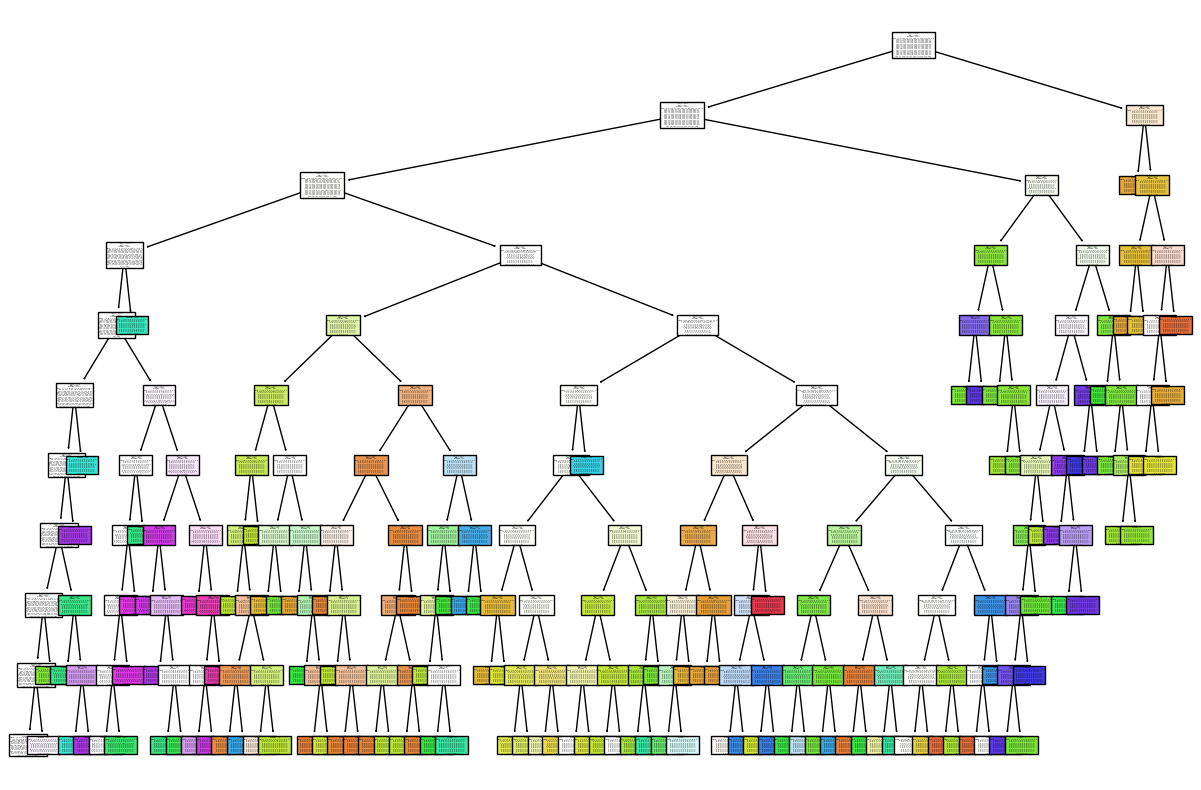

In [8]:
from sklearn.tree import DecisionTreeClassifier
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=10)
treemodel.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [9]:
y_pred=treemodel.predict(X_test)

In [16]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [17]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [18]:
cv.fit(X_train,y_train)

c:\Users\soura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\soura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\soura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\soura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
y_pred=cv.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
score

0.9634759666914008

In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        68
           1       0.95      0.88      0.91        67
           2       0.99      0.99      0.99        82
           3       1.00      0.97      0.98        64
           4       0.99      1.00      0.99        73
           5       0.99      0.96      0.98       138
           6       0.96      0.96      0.96       137
           7       0.99      1.00      0.99        72
           8       0.80      0.98      0.88        42
           9       0.98      1.00      0.99        62
          10       0.96      1.00      0.98        52
          11       1.00      0.95      0.97        74
          12       1.00      0.99      0.99        70
          13       0.92      0.94      0.93       126
          14       1.00      1.00      1.00        68
          15       1.00      0.97      0.98        66
          16       0.99      1.00      0.99        76
          17       0.84    

In [ ]:
df_pred=pd.read_excel('Task1and2/test.xlsx')
result_org=cv.predict(df_pred)
result=pd.DataFrame({'target':result_org})
file_name = 'results/Classification_Dicition_tree_result.xlsx'
# saving the excel
result.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [26]:
result_org

array([151,   1, 141, ..., 145,  31,  78])

In [38]:
result_org=cv.predict(df_pred)
result_org=le.inverse_transform(result_org)
result=pd.DataFrame({'target':result_org})
file_name = 'results/Classification_Dicition_tree_result.xlsx'
# saving the excel
result.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [39]:
result

,target
0,B74
1,A10
2,B65
3,B20
4,A67
...,...
15747,A71
15748,A16
15749,B69
15750,A38
